In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

In [3]:
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [4]:
df.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [5]:
test_df=pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [6]:
test_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [7]:
test_df.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [8]:
X_train=df.drop(['Unnamed: 0','species'],axis=1)
y_train=df.species

In [9]:
X_test=test_df.drop(['Unnamed: 0','species'],axis=1)
y_test=test_df.species

In [10]:
rs=np.random.seed(0)

In [11]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=rs,max_depth=1)

In [12]:
scores_data=pd.DataFrame()

In [13]:
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth , random_state=rs)
    clf.fit(X_train,y_train)
    
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [14]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [15]:
scores_data_long=pd.melt(scores_data,
                         id_vars='max_depth',
                         value_vars = ['train_score','test_score'],
                         var_name = 'set_type',
                         value_name = 'score')

In [16]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

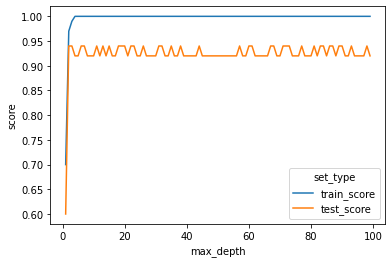

In [17]:
sns.lineplot(x='max_depth',y='score',hue= 'set_type',data=scores_data_long)

In [46]:
# построение модели на ирисах используя библу  GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
# подбор параметров для модели -  глубины, минимального количества листьев для разбиения узла, 
# минимального количества оставшихся samples для разбиения на остальные листья
# 'min_samples_leaf'  : [2]
parametrs = {'max_depth' : range(1,10), 'min_samples_split' : range(2,10) , 'min_samples_leaf'  :  range(1,10) }

search = GridSearchCV(clf, parametrs,cv=5)
search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [41]:
best_tree = search.best_estimator_

In [42]:
best_params  = search.best_params_

In [43]:
best_params

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [44]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

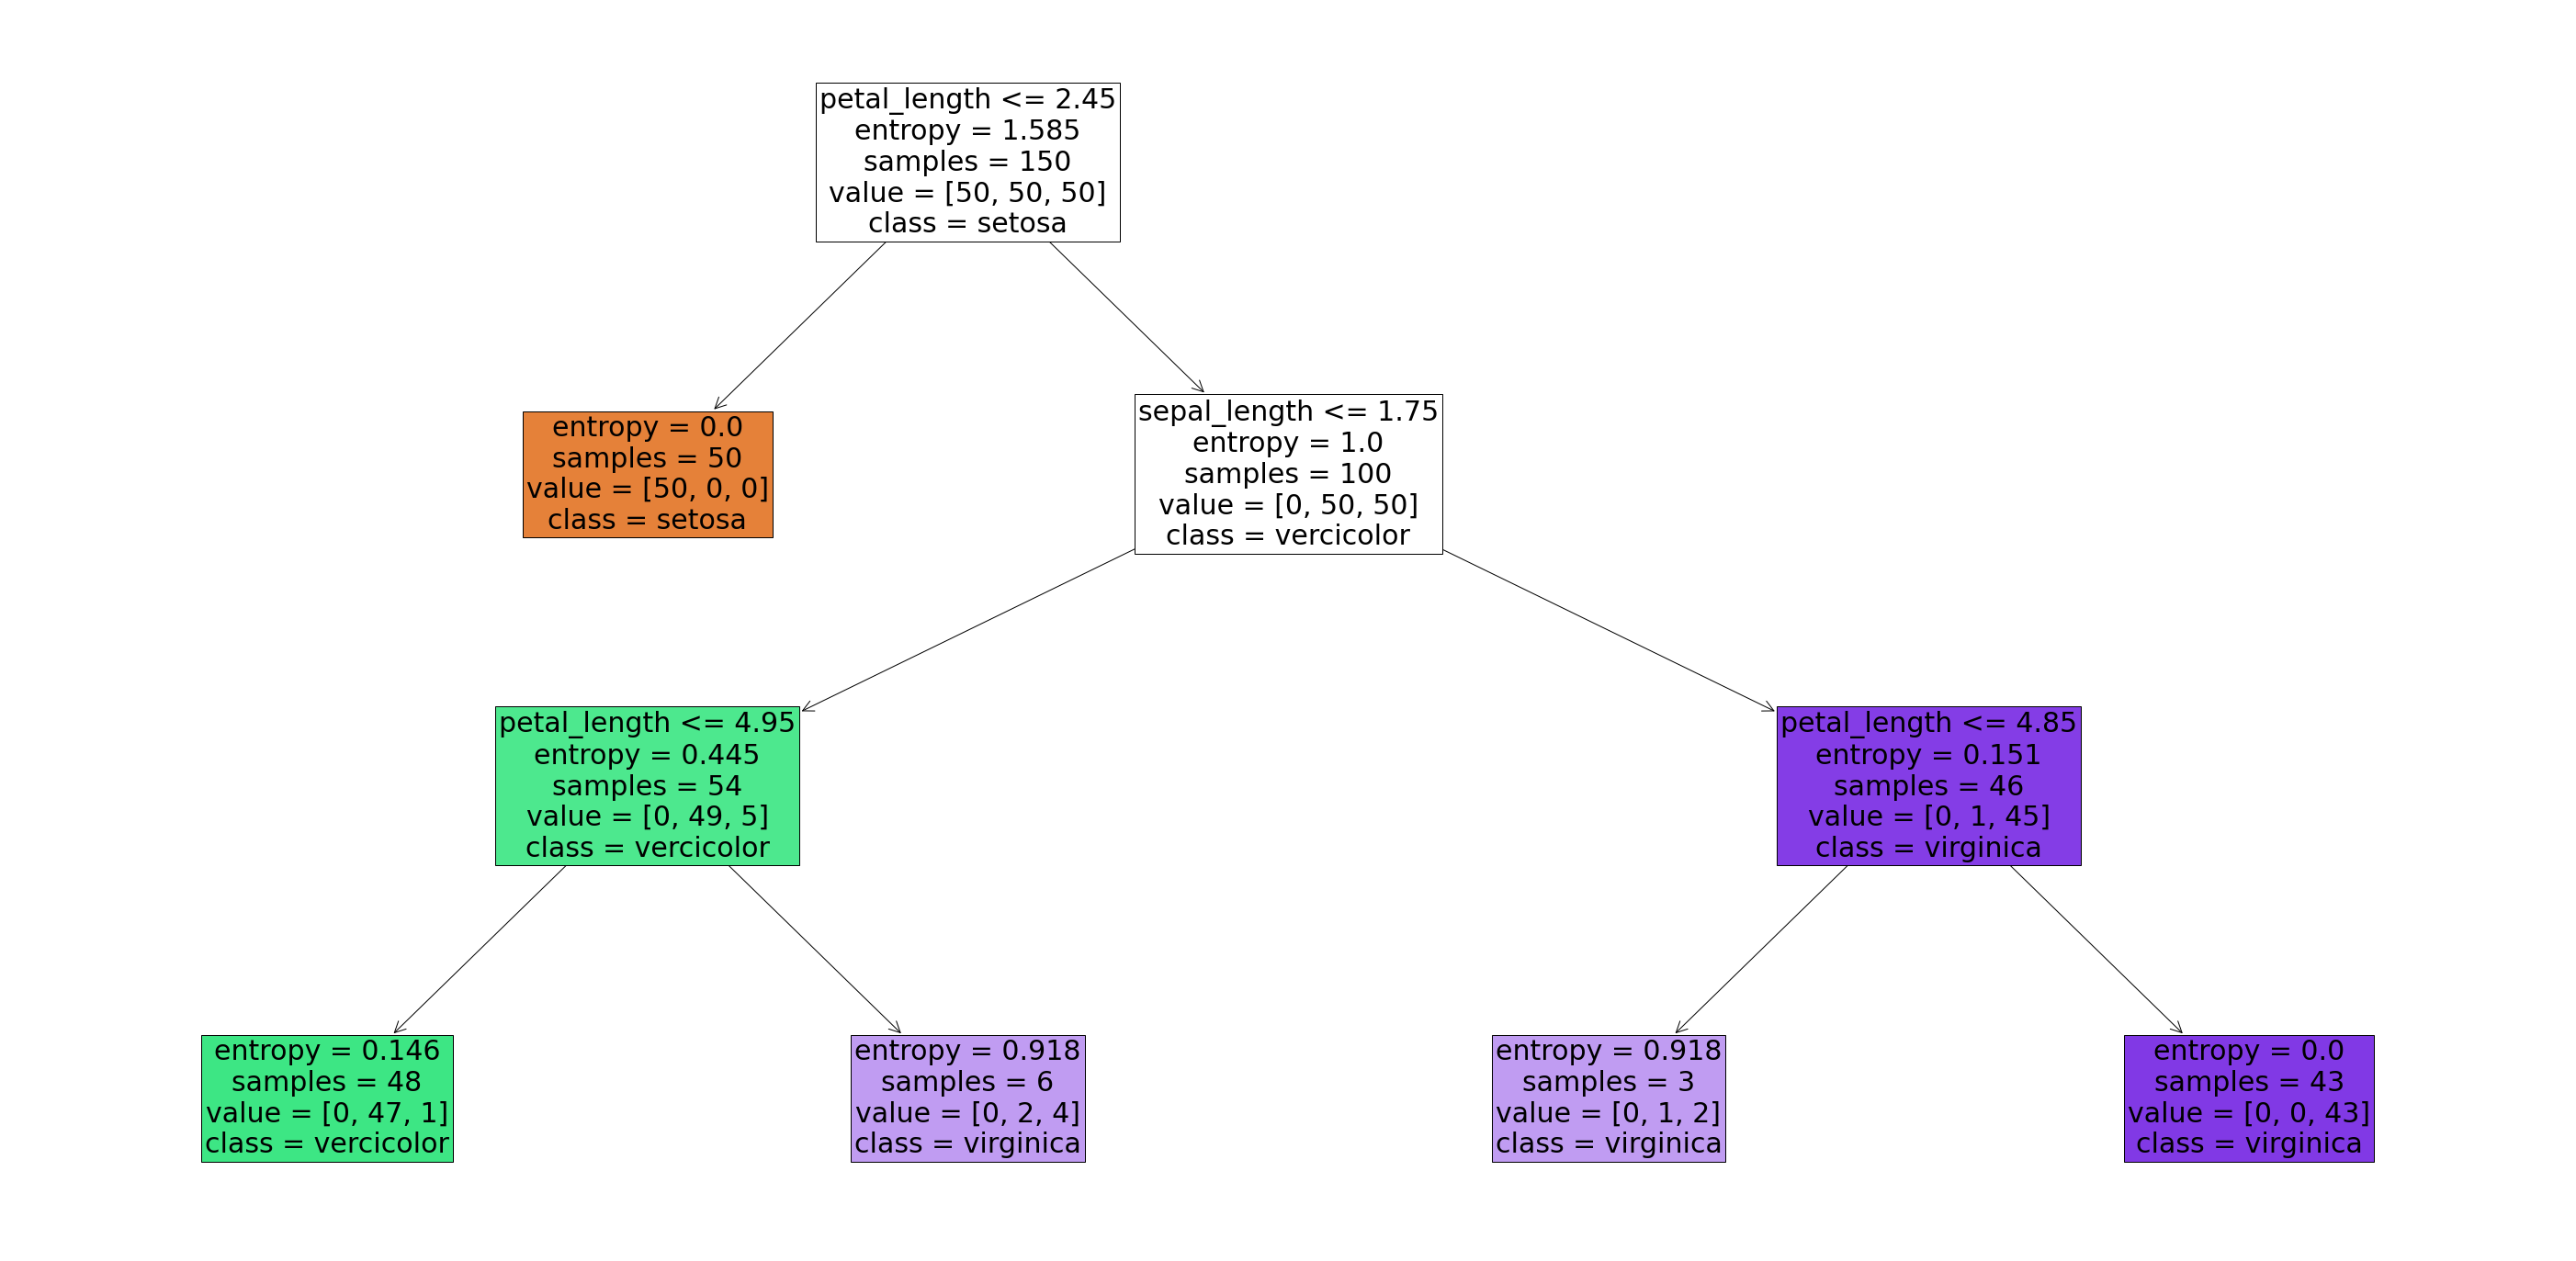

In [45]:
plt.figure(figsize=(50,25))
tree.plot_tree(best_tree , feature_names = ['sepal_length' , 'sepal_width','petal_length','sepal_length'], class_names = ['setosa' , 'vercicolor' , 'virginica'] , filled =True,fontsize = 30);
plt.show()

In [ ]:
plt.figure(figsize=(50,25))
tree.plot_tree(clf,feature_names=list(X_train),class_names=['Died','Survived'],filled=True)
plt.show()